In [1]:
#This is the example of bayesian optimization detailed under GP example using George with Expected Improvement Utility added

#George is a very simple Gaussian Process package with Bayesian Optimization
import george
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Our example: x range is between -2 and 4, true f(x) = sin(x)
x_star=np.linspace(-2,4,50)

#We need to create a Gaussian Process
#For our example, we will have a squared exponential kernel with lengthscale = 1 and sigma = 3
lengthscale=1
sigma=3
kernel=sigma*george.kernels.ExpSquaredKernel(metric=lengthscale,ndim=1)
gp=george.GP(kernel)

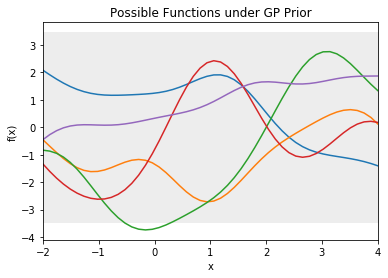

In [3]:
#Let's plot 5 possible functions equally likely based on our prior
gp_prior=gp.sample(x_star,size=5)
gp.compute(x_star)
cov=gp.get_matrix(x_star)
stdev=np.sqrt(cov.diagonal())
for i in range(0,5):
    plt.plot(x_star,gp_prior[i])
plt.fill_between(x_star, np.zeros(len(x_star))-2*stdev, np.zeros(len(x_star))+2*stdev,color="#ededed")
plt.xlim([-2,4])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("Possible Functions under GP Prior")
plt.show()

In [4]:
#Let's say we sample once
x_ev = np.array([-1])
#true y function  = sin(x)
y_ev=[np.sin(i) for i in x_ev]


gp.compute(x_ev)
[mu,var]=gp.predict(y_ev,x_star,return_var=True)
stdev=np.sqrt(var)

C:\Users\schultz\Anaconda2\lib\site-packages\george-0.3.0-py2.7-win-amd64.egg\george\utils.py:30: RuntimeWarning: covariance is not positive-semidefinite.


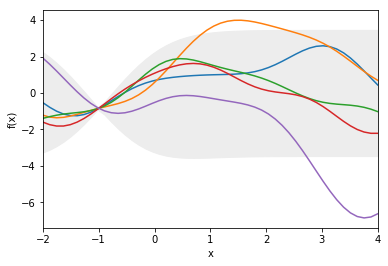

In [5]:
#Having updated our GP, let's plot the probable functions given our data and prior
gp_post=gp.sample_conditional(y_ev,x_star,size=5)
for i in range(0,5):
    plt.plot(x_star,gp_post[i])
plt.xlim([-2,4])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.fill_between(x_star, mu-2*stdev, mu+2*stdev,color="#ededed")
plt.show()

Let's decide where to sample next based on an Acquisition Function

Defined by Mockus, this acquisition function maximizes the expected improvement with respect to f(x+):

\begin{equation*}
EI(x) = \mathbb{E}[\max [0, f_{n+1}(x) - f(x^+)]|x_1..x_n]
\end{equation*}
If the function of interest is a Gaussian, this can be written as

\begin{equation*}
EI(x) = \sigma(x) [u\Phi(u) + \phi(u)]
\end{equation*}

where $u = \frac{f(x^+)-\mu}{\sigma(x)}$, $\Phi(\cdot)$ is the normal cumulative distribution, and $\phi(\cdot)$ is the normal density function.

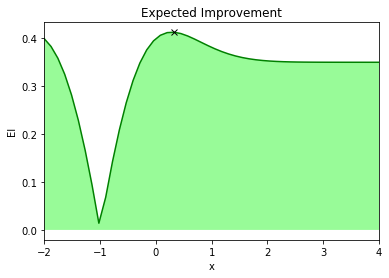

In [6]:
#Find the next sample using EI
cur_min=np.min(y_ev)
z=(cur_min-mu)/stdev
Phi=stats.norm.cdf(z)
phi=stats.norm.pdf(z)
EI=stdev*(z*Phi + phi)
plt.plot(x_star,EI,'g')
plt.fill_between(x_star,EI,0,facecolor='#98FB98')
plt.xlim([-2,4])
plt.ylabel("EI")
plt.xlabel("x")
plt.title("Expected Improvement")
plt.plot(x_star[np.argmax(EI)],np.max(EI),'kx')
plt.show()

In [7]:
next_sample=x_star[np.argmax(EI)]
print(next_sample)

0.326530612245


In [8]:
#Add our new sample to our evaluations

x_ev=np.append(x_ev,next_sample)
y_ev=[np.sin(i) for i in x_ev]

#Update our posterior
gp.compute(x_ev)
[mu,var]=gp.predict(y_ev,x_star,return_var=True)
stdev=np.sqrt(var)

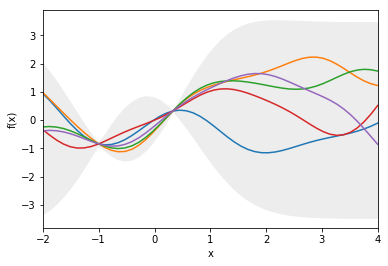

In [9]:
#Let's graph our new update!
gp_post=gp.sample_conditional(y_ev,x_star,size=5)
for i in range(0,5):
    plt.plot(x_star,gp_post[i])
plt.xlim([-2,4])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.fill_between(x_star, mu-2*stdev, mu+2*stdev,color="#ededed")
plt.show()

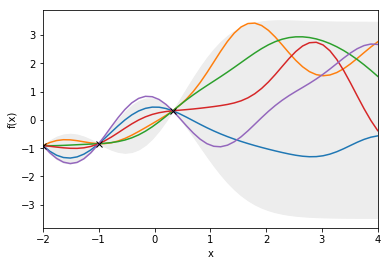

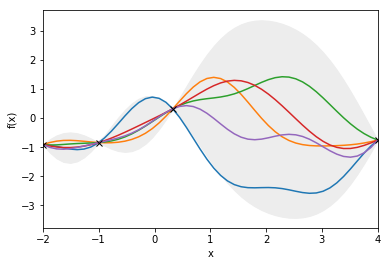

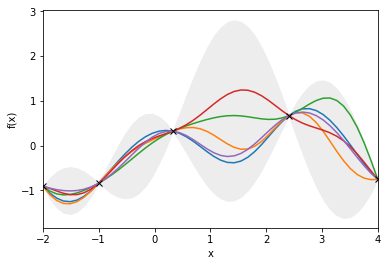

In [10]:
#now that we have the jist, let's just sample a couple of times
for i in range(0,3):
    #Find the next sample using EI
    cur_min=np.min(y_ev)
    z=(cur_min-mu)/stdev
    Phi=stats.norm.cdf(z)
    phi=stats.norm.pdf(z)
    EI=stdev*(z*Phi + phi)
    x_ev=np.append(x_ev,x_star[np.argmax(EI)])
    y_ev=[np.sin(i) for i in x_ev]
    
    gp.compute(x_ev)
    [m_new,var_new]=gp.predict(y_ev,x_star,return_var=True)
    stdev=np.sqrt(var_new)
    gp_post=gp.sample_conditional(y_ev,x_star,size=5)
    for j in range(0,5):
        plt.plot(x_star,gp_post[j])
    plt.plot(x_ev,y_ev,"kx")
    plt.xlim([-2,4])
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.fill_between(x_star, m_new-2*stdev, m_new+2*stdev, color="#ededed")
    plt.show()